In [39]:
import pydicom as pyd
import os
import numpy
from matplotlib import pyplot, cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
PathDicom = "./ircad_data/3Dircadb1.1/PATIENT_DICOM/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if "" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [82]:
lstFilesDCM# Get ref file
RefDs = pyd.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [83]:
ConstPixelDims

(512, 512, 129)

In [84]:
ConstPixelSpacing

(0.569999992847443, 0.569999992847443, 1.600000023841858)

In [85]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [86]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pyd.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array 

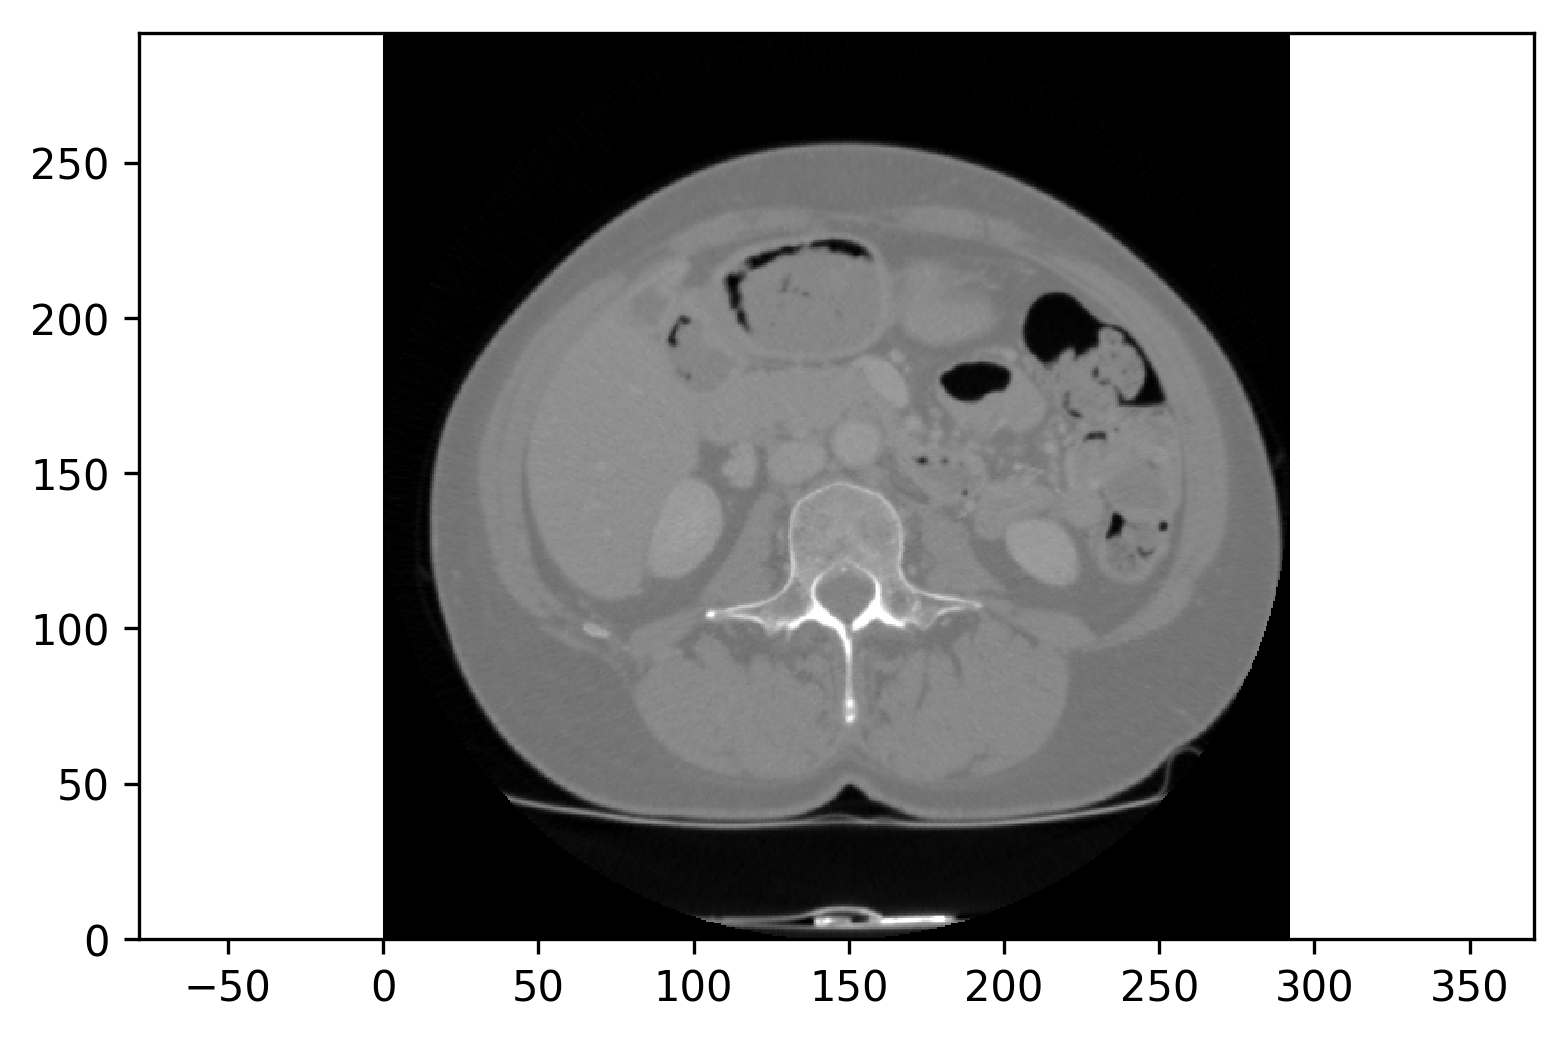

In [87]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 21]))

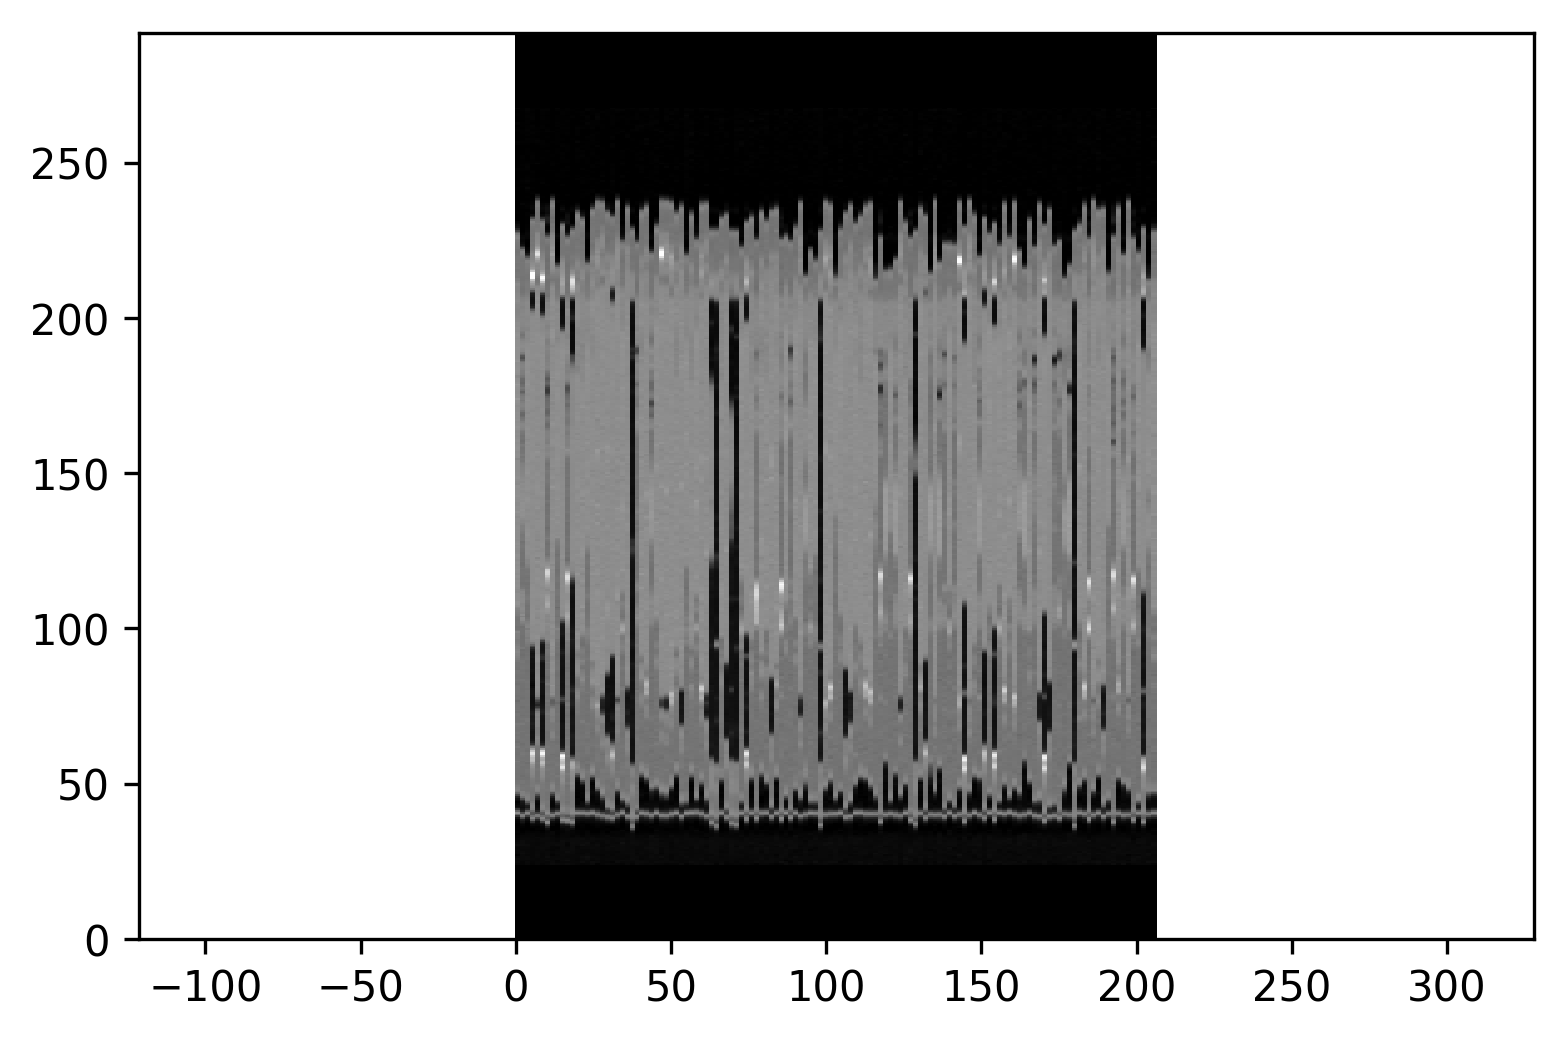

In [88]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(z, x, numpy.flipud(ArrayDicom[:, 115, :]))

In [80]:
lstFilesDCM

['./ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_49',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_16',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_37',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_112',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_93',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_113',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_0',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_91',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_34',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_116',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_3',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_120',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_66',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_59',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_35',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_70',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/image_85',
 './ircad_data/3Dircadb1.1/MASKS_DICOM/liver/i